## Лабораторная работа 4
### Нагаев Алексей 20-ИВТ-3
### Вариант 4

Цель лабораторной работы – получение навыков работы с методами регрессии
1.	Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт).
2.	Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции;
3.	Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию);
4.	Выполните замену категориальных признаков; выберите и обоснуйте способ замены;
5.	Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других;
6.	Заполните пропущенные значения в данных;
7.	Решите поставленную задачу регрессии в соответствии с заданием. При подборе параметров метода принятия решения (метода регрессии) используйте перекрёстную проверку (изучите возможные для изменения параметры метода регрессии).  Вычислите точность решения задачи, вычислив разницу между реальным значением и предсказанным. Вычислите коэффициент корреляции (Пирсона, Спирмена) между реальным значением и предсказанным с учётом p-value. 


Классификаторы:
* Линейная регрессия без использования регуляризаторов
* Линейная регрессия, LASSO регуляризатор

### Описание набора данных
#### House Data Set

#### Этот набор данных содержит цены продажи домов для округа Кинг, в который входит Сиэтл. Сюда входят дома, проданные в период с мая 2014 по май 2015 года.

##### Входные переменные:

* id - уникальный идентификатор для каждого проданного дома
* date - дата продажи дома
* price - цена проданного дома
* bedrooms - кол-во спален
* bathrooms - кол-во ванных комнат, где половина - комната с туалетом, но без душа
* sqft_living - метраж внутренней жилой площади квартиры
* sqft_lot - метраж земельного участка
* floors - этаж
* waterfront - выходит ли квартира на береговую линию
* view - оценка собственности от 0 до 4
* condition - условия в апартаментах от 0 до 5
* grade - индекс уровня строительства( 1-3 далек от строительства, 7 - средний уровень, 11-13 высококачественный уровень строительства)
* sqft_above - площадь в квадратных футах внутренней жилплощади, над уровнем земли
* sqft_basement - площадь в квадратных футах внутренней жилплощади ниже уровня земли
* yr_built - год постройки
* yr_renovated - год последней реставрации
* zipcode - почтовый индекс
* lat - широта
* long - долгота
* sqft_living15 - жилая площадь ближайших 15 соседей
* vsqft_lot15 - общая площадь ближайших 15 соседей


In [153]:
import pandas as pd

In [154]:
df = pd.read_csv('kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


Удаление дубликатов

In [155]:
print('До удаления:', df.shape)

До удаления: (21613, 21)


In [156]:
df.drop_duplicates(keep ='first', inplace =True)  
print('После удаления:', df.shape)

После удаления: (21613, 21)


Замена категориальных признаков

In [157]:
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [158]:
not_categorial = df.drop(['date', 'id', 'waterfront', 'view', 'condition', 'grade', 'yr_built', 'yr_renovated', 'zipcode'], axis=1)
categorial = df.drop(not_categorial, axis=1)
categorial

,id,date,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode
0,7129300520,20141013T000000,0,0,3,7,1955,0,98178
1,6414100192,20141209T000000,0,0,3,7,1951,1991,98125
2,5631500400,20150225T000000,0,0,3,6,1933,0,98028
3,2487200875,20141209T000000,0,0,5,7,1965,0,98136
4,1954400510,20150218T000000,0,0,3,8,1987,0,98074
...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,0,0,3,8,2009,0,98103
21609,6600060120,20150223T000000,0,0,3,8,2014,0,98146
21610,1523300141,20140623T000000,0,0,3,7,2009,0,98144
21611,291310100,20150116T000000,0,0,3,8,2004,0,98027


In [159]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for column in categorial:
    categorial[column] = pd.Series(label_encoder.fit_transform(categorial[column]))

categorial

,id,date,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode
0,15339,164,0,0,2,5,55,0,66
1,14466,220,0,0,2,5,51,45,55
2,13503,290,0,0,2,4,33,0,16
3,6371,220,0,0,4,5,65,0,58
4,4955,283,0,0,2,6,87,0,37
...,...,...,...,...,...,...,...,...,...
21608,574,19,0,0,2,6,109,0,42
21609,14564,288,0,0,2,6,114,0,60
21610,3621,52,0,0,2,5,109,0,59
21611,629,252,0,0,2,6,104,0,15


Масштабирование количественных признаков

In [160]:
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [161]:
normilized_data = not_categorial


BoxPlot до масштабирования:


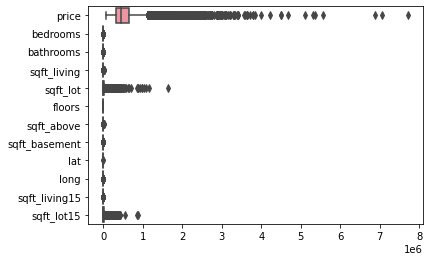

In [162]:
sns.boxplot(data = normilized_data, orient = 'h')
print('BoxPlot до масштабирования:')

BoxPlot после масштабирования:


<AxesSubplot:>

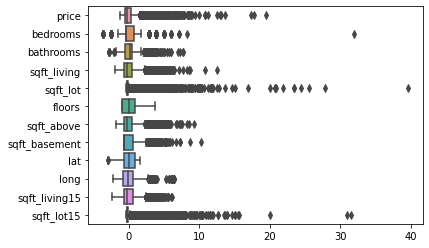

In [163]:
scaler = StandardScaler()
scaler.fit(normilized_data)
normilized_data = scaler.transform(normilized_data)

normilized_data = pd.DataFrame(normilized_data, columns = not_categorial.columns)

print('BoxPlot после масштабирования:')
sns.boxplot(data = normilized_data, orient = 'h')

In [164]:
df = pd.concat([normilized_data, categorial], axis = 1)
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,lat,long,...,sqft_lot15,id,date,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode
0,-0.866717,-0.398737,-1.447464,-0.979835,-0.228321,-0.915427,-0.734708,-0.658681,-0.352572,-0.306079,...,-0.260715,15339,164,0,0,2,5,55,0,66
1,-0.005688,-0.398737,0.175607,0.533634,-0.189885,0.936506,0.460841,0.245141,1.161568,-0.746341,...,-0.187868,14466,220,0,0,2,5,51,45,55
2,-0.980849,-1.473959,-1.447464,-1.426254,-0.123298,-0.915427,-1.229834,-0.658681,1.283537,-0.135655,...,-0.172375,13503,290,0,0,2,4,33,0,16
3,0.174090,0.676485,1.149449,-0.130550,-0.244014,-0.915427,-0.891699,1.397515,-0.283288,-1.271816,...,-0.284522,6371,220,0,0,4,5,65,0,58
4,-0.081958,-0.398737,-0.149007,-0.435422,-0.169653,-0.915427,-0.130895,-0.658681,0.409550,1.199335,...,-0.192849,4955,283,0,0,2,6,87,0,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,-0.490545,-0.398737,0.500221,-0.598746,-0.337424,2.788439,-0.312039,-0.658681,1.004958,-0.938069,...,-0.412381,574,19,0,0,2,6,109,0,42
21609,-0.381588,0.676485,0.500221,0.250539,-0.224386,0.936506,0.629908,-0.658681,-0.356180,-1.051685,...,-0.203946,14564,288,0,0,2,6,114,0,60
21610,-0.375865,-1.473959,-1.772078,-1.154047,-0.332137,0.936506,-0.927928,-0.658681,0.247888,-0.604321,...,-0.394141,3621,52,0,0,2,5,109,0,59
21611,-0.381588,-0.398737,0.500221,-0.522528,-0.307076,0.936506,-0.227505,-0.658681,-0.184414,1.028910,...,-0.420511,629,252,0,0,2,6,104,0,15


Оценка корреляции

In [165]:
corr_df = df.corr()
corr_df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,lat,long,...,sqft_lot15,id,date,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode
price,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.605567,0.323816,0.307003,0.021626,...,0.082447,-0.016534,-0.004649,0.266369,0.397293,0.036362,0.667529,0.054012,0.133179,-0.050889
bedrooms,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,0.477600,0.303093,-0.008931,0.129473,...,0.029244,0.002111,-0.016964,-0.006582,0.079532,0.028472,0.356898,0.154178,0.028306,-0.152008
bathrooms,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.685342,0.283770,0.024573,0.223042,...,0.087175,0.003799,-0.034481,0.063744,0.187737,-0.124982,0.665012,0.506019,0.065764,-0.192873
sqft_living,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.876597,0.435043,0.052529,0.240223,...,0.183286,-0.013209,-0.034570,0.103818,0.284611,-0.058753,0.762785,0.318049,0.062516,-0.192005
sqft_lot,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.183512,0.015286,-0.085683,0.229521,...,0.718557,-0.136543,0.006361,0.021604,0.074710,-0.008958,0.113650,0.053080,0.003469,-0.125899
floors,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.523885,-0.245705,0.049614,0.125419,...,-0.011269,0.015836,-0.022395,0.023698,0.029444,-0.263768,0.458241,0.489319,0.008662,-0.038788
sqft_above,0.605567,0.477600,0.685342,0.876597,0.183512,0.523885,1.000000,-0.051943,-0.000816,0.343803,...,0.194050,-0.013249,-0.027890,0.072075,0.167649,-0.158214,0.756008,0.423898,0.025868,-0.244073
sqft_basement,0.323816,0.303093,0.283770,0.435043,0.015286,-0.245705,-0.051943,1.000000,0.110538,-0.144765,...,0.017276,-0.002623,-0.019554,0.080588,0.276947,0.174105,0.168401,-0.133124,0.081335,0.058224
lat,0.307003,-0.008931,0.024573,0.052529,-0.085683,0.049614,-0.000816,0.110538,1.000000,-0.135512,...,-0.086419,-0.001840,-0.032851,-0.014274,0.006157,-0.014941,0.114099,-0.148122,0.029883,0.300194
long,0.021626,0.129473,0.223042,0.240223,0.229521,0.125419,0.343803,-0.144765,-0.135512,1.000000,...,0.254451,0.015564,-0.007205,-0.041910,-0.078400,-0.106500,0.198504,0.409356,-0.065374,-0.517161


<AxesSubplot:>

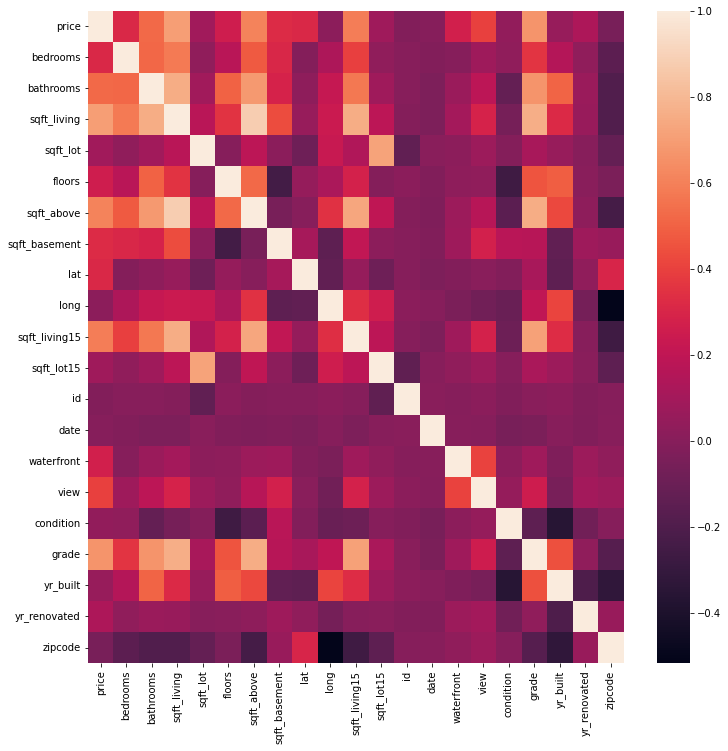

In [166]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 12))
sns.heatmap(corr_df)

In [167]:
df.drop(['id', 'date', 'yr_renovated'], axis=1, inplace=True)
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15,waterfront,view,condition,grade,yr_built,zipcode
0,-0.866717,-0.398737,-1.447464,-0.979835,-0.228321,-0.915427,-0.734708,-0.658681,-0.352572,-0.306079,-0.943355,-0.260715,0,0,2,5,55,66
1,-0.005688,-0.398737,0.175607,0.533634,-0.189885,0.936506,0.460841,0.245141,1.161568,-0.746341,-0.432686,-0.187868,0,0,2,5,51,55
2,-0.980849,-1.473959,-1.447464,-1.426254,-0.123298,-0.915427,-1.229834,-0.658681,1.283537,-0.135655,1.070140,-0.172375,0,0,2,4,33,16
3,0.174090,0.676485,1.149449,-0.130550,-0.244014,-0.915427,-0.891699,1.397515,-0.283288,-1.271816,-0.914174,-0.284522,0,0,4,5,65,58
4,-0.081958,-0.398737,-0.149007,-0.435422,-0.169653,-0.915427,-0.130895,-0.658681,0.409550,1.199335,-0.272190,-0.192849,0,0,2,6,87,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,-0.490545,-0.398737,0.500221,-0.598746,-0.337424,2.788439,-0.312039,-0.658681,1.004958,-0.938069,-0.666135,-0.412381,0,0,2,6,109,42
21609,-0.381588,0.676485,0.500221,0.250539,-0.224386,0.936506,0.629908,-0.658681,-0.356180,-1.051685,-0.228419,-0.203946,0,0,2,6,114,60
21610,-0.375865,-1.473959,-1.772078,-1.154047,-0.332137,0.936506,-0.927928,-0.658681,0.247888,-0.604321,-1.410253,-0.394141,0,0,2,5,109,59
21611,-0.381588,-0.398737,0.500221,-0.522528,-0.307076,0.936506,-0.227505,-0.658681,-0.184414,1.028910,-0.841221,-0.420511,0,0,2,6,104,15


Заполнение пропущенных данных

In [168]:
df.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
sqft_above       0
sqft_basement    0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
waterfront       0
view             0
condition        0
grade            0
yr_built         0
zipcode          0
dtype: int64

Решение поставленной задачи регрессии в соответствии с заданием.

Линейная регрессия

In [169]:
from sklearn.model_selection import GridSearchCV, train_test_split

In [170]:
x, y = df.drop('price', axis = 1), df['price']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [171]:
from sklearn.linear_model import LinearRegression

In [172]:
linear = LinearRegression()

linear.fit(x_train, y_train)

LinearRegression()

In [173]:
linear.coef_

array([-0.08906683,  0.08789045,  0.22761962,  0.01964311,  0.01412875,
        0.21298258,  0.07385463,  0.23179312, -0.08143637,  0.04247521,
       -0.03494276,  1.6688561 ,  0.14411645,  0.06440625,  0.25582893,
       -0.00748583, -0.00455277])

In [174]:
from scipy.stats import pearsonr, spearmanr

predict = linear.predict(x_test)
pearson, P_p_value = pearsonr(predict, y_test)
spearman, S_p_value = spearmanr(predict, y_test)

print("Spearman correlation: ", spearman)
print("Pearson correlation: ", pearson)

if P_p_value < 0.05:
    print('p_value (Pearson) is good')
else:
    print('p_value (Pearson) is not good')
if S_p_value < 0.05:
    print('p_value (Spearman) is good')
else:
    print('p_value (Spearman) is not good')

Spearman correlation:  0.8563569389397595
Pearson correlation:  0.8346849380098166
p_value (Pearson) is good
p_value (Spearman) is good


Линейная регрессия. LASSO регуляризатор

In [175]:
from sklearn.linear_model import Lasso
import numpy as np

In [176]:
las = Lasso()

params = {'alpha': np.arange(0.01, 0.1, 0.01), 'max_iter' : np.arange(100,110)}

grid = GridSearchCV(las, params)
grid.fit(x_train, y_train)

GridSearchCV(estimator=Lasso(),
             param_grid={'alpha': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]),
                         'max_iter': array([100, 101, 102, 103, 104, 105, 106, 107, 108, 109])})

In [177]:
best_alpha = grid.best_estimator_.alpha
best_max_iter = grid.best_estimator_.max_iter
best_alpha

0.01

In [178]:
las = Lasso(alpha = best_alpha, max_iter = best_max_iter)
las.fit(x_train, y_train)
pred_las = las.predict(x_test)
pred_las

array([-0.48825929,  2.67296125,  0.03500844, ..., -0.47633077,
       -0.8595718 , -0.24878473])

In [179]:
pearson, P_p_value = pearsonr(pred_las, y_test)
spearman, S_p_value = spearmanr(pred_las, y_test)

print('Spearman correlation: ', spearman)
print('Pearson correlation: ', pearson)
if P_p_value < 0.05:
    print('p_value (Pearson) is good')
else:
    print('p_value (Pearson) is not good')
if S_p_value < 0.05:
    print('p_value (Spearman) is good')
else:
    print('p_value (Spearman) is not good')

Spearman correlation:  0.8553512651193284
Pearson correlation:  0.831955821220228
p_value (Pearson) is good
p_value (Spearman) is good
